<a href="https://colab.research.google.com/github/DSSon/-Encore-Machine_Learning/blob/main/7%EC%A1%B0_Machine_Learning_From_Hell_(MLFH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. 수치 예측 문제
제목 : Bike Sharing Demand
설명 : 워싱턴 D.C의 자전거 무인 대여 시스템 과거 기록을 기반으로 향후 자전거 대여 수요를 예측
링크 : https://www.kaggle.com/c/bike-sharing-demand
문제 유형 : 수치 예측


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 적재

In [ ]:
test_data= pd.read_csv('/content/bike_sharing_test.csv')
train_data = pd.read_csv('/content/bike_sharing_train.csv')

# 적재한 데이터 확인

In [ ]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime : 시간별 날짜
- season : 1=봄, 2=여름, 3=가을, 4=겨울
- holiday : 하루가 휴일로 간주되는지 여부
- workingday : 주말과 휴일이 아닌 일하는 날
- weather : 
            1: 맑음,구름 조금,흐림
            2: 안개+흐림, 안개+구름, 안개+ 구름이 거의 없음 + 흐림
            3: 가벼운 눈, 가벼운 비 + 천둥+ 구름, 가벼운 비 + 구름
            4: 폭우 + 우박 + 천둥 + 안개, 눈 + 안개
- temp : 섭씨온도
- atemp : 체감온도
- humidity : 상대 습도
- windspeed : 풍속
- casual : 미등록 사용자 대여수
- registered : 등록된 사용자 대여수
- count : 총 대여수

In [ ]:
train_data.describe()

In [ ]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 시각화

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f050cac3550>,
      dtype=object)

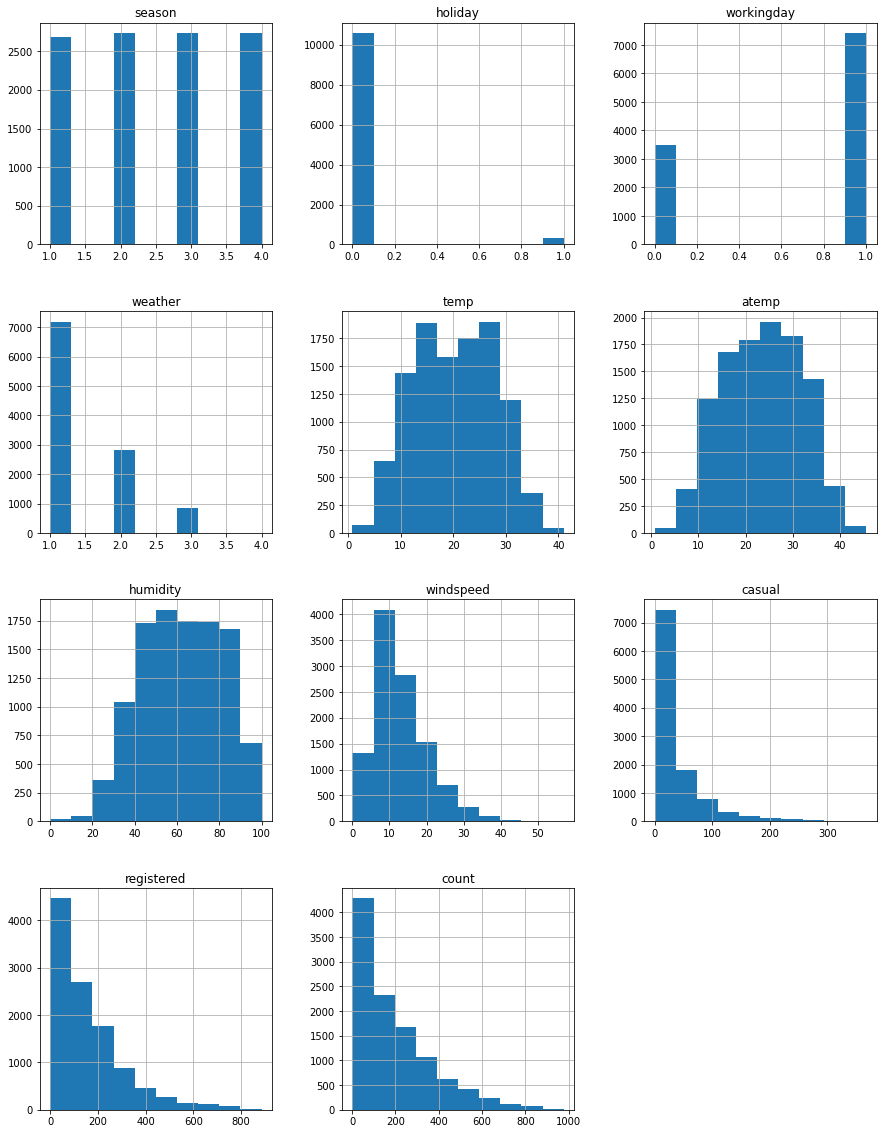

In [ ]:
# histogram 확인
train_data.hist(figsize=(15,20))

In [ ]:
train_data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


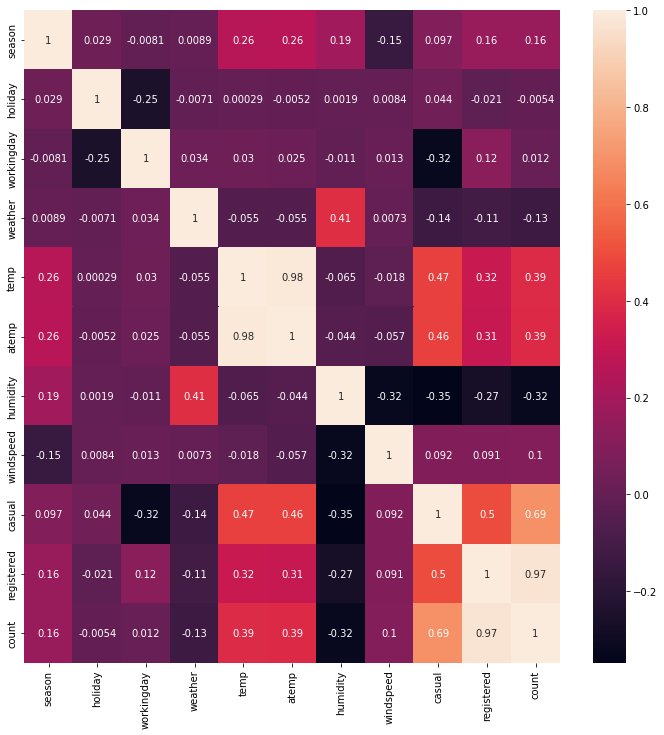

In [34]:
# 피어슨 상관관계를 heatmap으로 표현
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True)

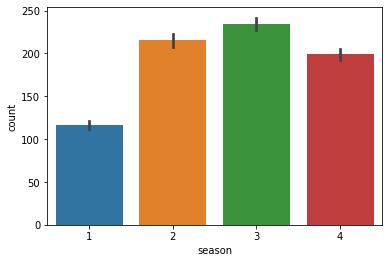

In [36]:
# 계절별로 대여수 barplot으로 시각화
sns.barplot(data=train_data, x='season', y='count')

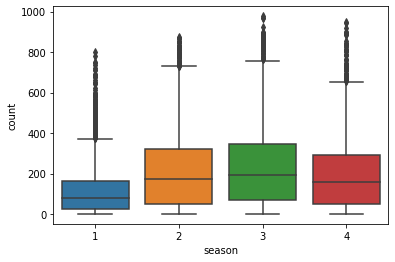

In [39]:
# 계절별로 대여수 boxplot으로 시각화
sns.boxplot(data=train_data, x='season', y='count')

## 시간에 따른 대여량 
- 1: 맑음,구름 조금,흐림
- 2: 안개+흐림, 안개+구름, 안개+ 구름이 거의 없음 + 흐림
- 3: 가벼운 눈, 가벼운 비 + 천둥+ 구름, 가벼운 비 + 구름
- 4: 폭우 + 우박 + 천둥 + 안개, 눈 + 안개
- Weather의 4: 폭우 + 우박 + 천둥 + 안개, 눈 + 안개 항목은 없다고 생각해도 될 데이터라, 향후 분석시에는 제거

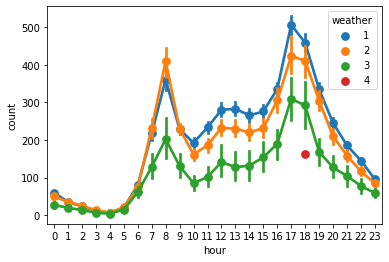

In [55]:
sns.pointplot(x= 'hour', y= 'count', data = train_data, hue= 'weather')

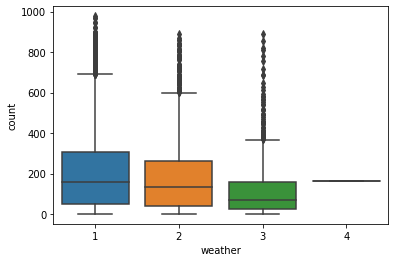

In [56]:
sns.boxplot(x='weather', y='count', data= train_data)

## 월별 대여량

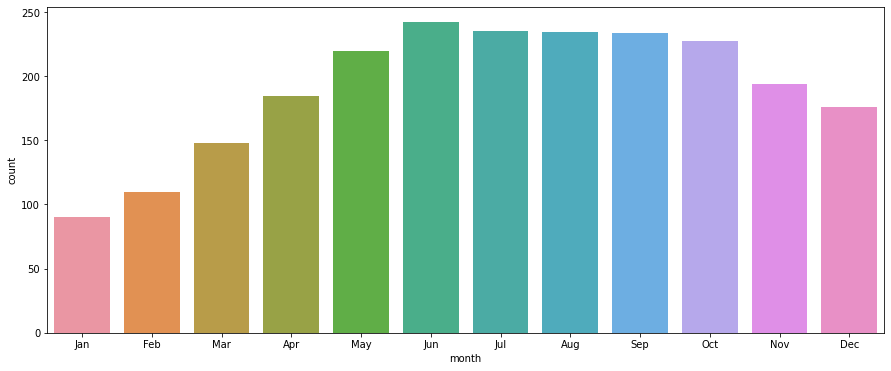

In [57]:
fig, ax = plt.subplots(figsize=(15,6))
# 월별 대여량
sns.barplot(data=train_data, x='month', y='count', ax=ax, ci=None)
# x축 값이름 변경
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
ax.set(xticklabels=labels)
plt.show()


## 계절에 따른 시간별 대여량

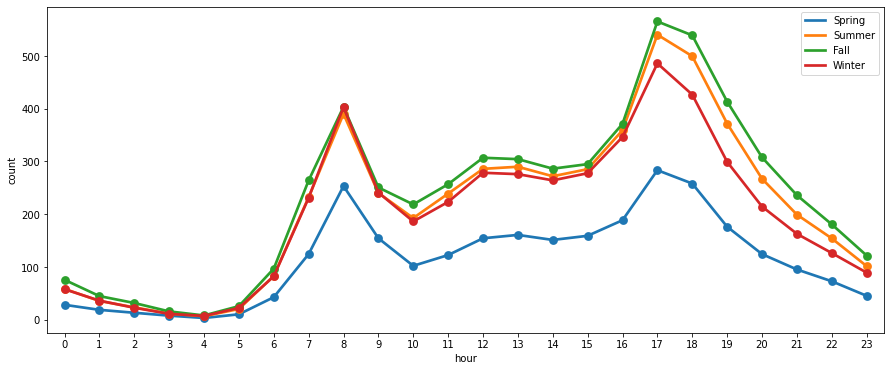

In [60]:
fig, ax = plt.subplots(figsize=(15,6))
# 계절에 따른 시간별 대여량
sns.pointplot(data=train_data, x='hour', y='count',hue='season', ax=ax, ci=None)
 
# x축 값이름 변경
labels=['Spring', 'Summer', 'Fall', 'Winter']
ax.legend(labels=labels)
 
plt.show()

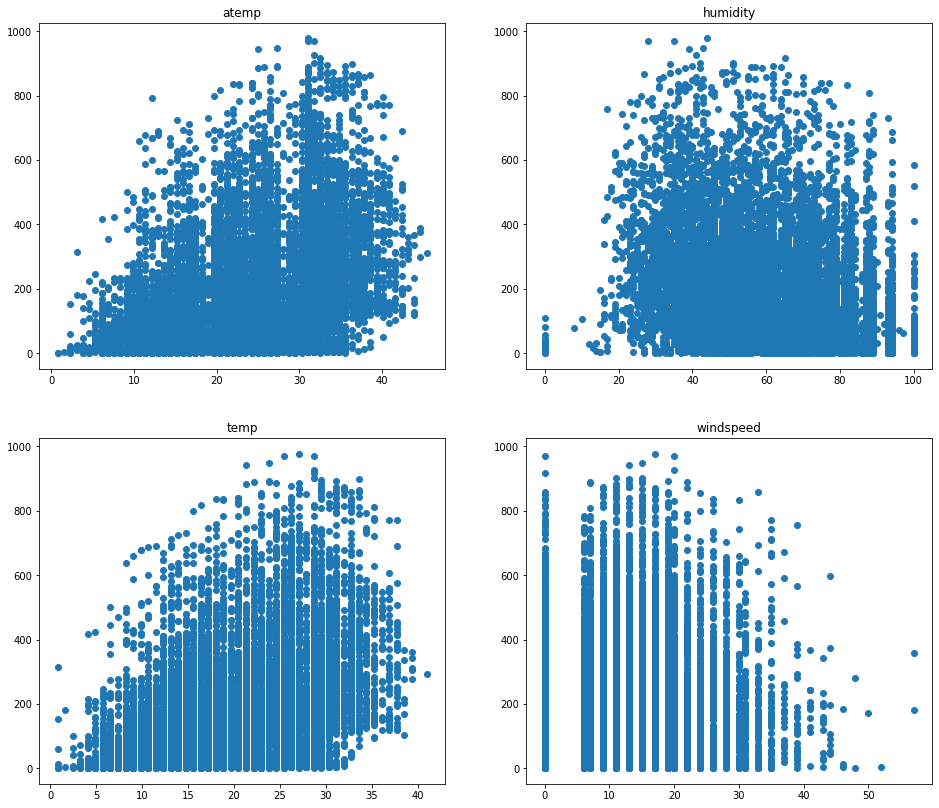

In [61]:
# 체감기온, 습도, 온도, 풍속을 scatter plot으로 시각화

fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
# scatter plot
ax[0][0].scatter(train_data['atemp'], train_data['count'])
ax[0][1].scatter(train_data['humidity'], train_data['count'])
ax[1][0].scatter(train_data['temp'], train_data['count'])
ax[1][1].scatter(train_data['windspeed'], train_data['count'])
 
# title 지정
ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')
 
plt.show()

- 풍속이 0이라는 것은 ‘바람이 불지않고 잔잔하다’ 또는 ‘데이터가 비어있다’ 라고 생각됨

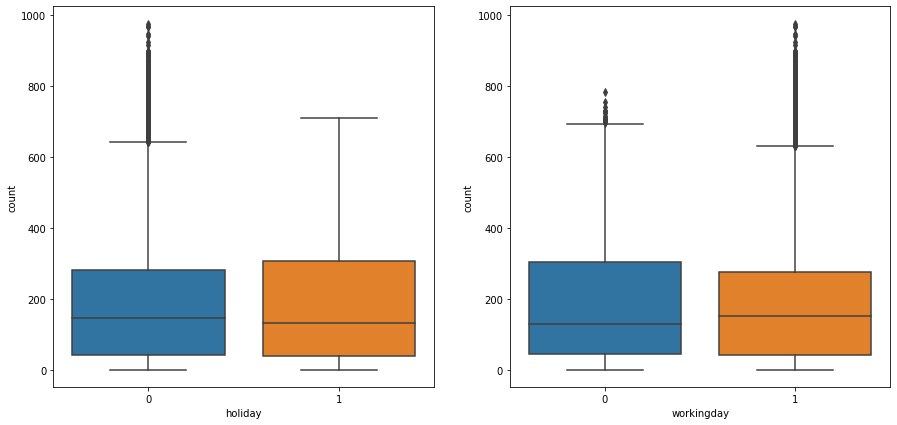

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
 
# holiday 와 workingday 의 boxplot
sns.boxplot(data=train_data, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=train_data, x='workingday', y='count', ax=ax[1])
 
plt.show()

# datetime 열을 datetime 속성으로 변경

In [48]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['year'] = train_data['datetime'].dt.year
train_data['month'] = train_data['datetime'].dt.month
train_data['day'] = train_data['datetime'].dt.day
train_data['hour'] = train_data['datetime'].dt.hour


In [49]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

이정호


이강주


김재희


손덕승
